In [21]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [22]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("threnjen/board-games-database-from-boardgamegeek")

print("Path to dataset files:", path)

base_dir = os.getcwd()

Path to dataset files: /home/nico/.cache/kagglehub/datasets/threnjen/board-games-database-from-boardgamegeek/versions/4


In [23]:
import pandas as pd
import numpy as np

os.chdir(path)
#!dir
user_ratings = pd.read_csv('user_ratings.csv')
mechanics_df = pd.read_csv('mechanics.csv')
games_df = pd.read_csv('games.csv')
os.chdir(base_dir)

In [44]:
user_ratings.head()

,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP


In [ ]:
mechanics_df.head()
games_df.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0


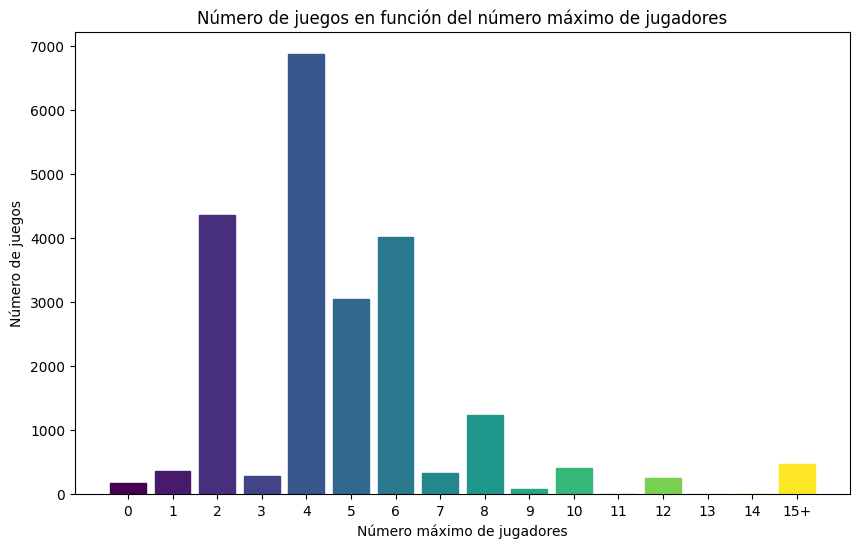

In [28]:
import matplotlib.pyplot as plt

# Agrupar los juegos con 20 o más jugadores en una sola categoría 20
games_df['MaxPlayers'] = games_df['MaxPlayers'].apply(lambda x: 15 if x >= 15 else x)

# Contar el número de juegos por número máximo de jugadores
max_players_count = games_df['MaxPlayers'].value_counts().sort_index()

# Crear el gráfico con gradiente de azul a verde
plt.figure(figsize=(10, 6))
max_players_count.index = max_players_count.index.astype(str)
max_players_count.index = max_players_count.index.str.replace('15', '15+')
bars = plt.bar(max_players_count.index, max_players_count, color=plt.cm.Blues(np.linspace(0, 1, len(max_players_count))))

# Aplicar gradiente de azul a verde
for bar, color in zip(bars, plt.cm.viridis(np.linspace(0, 1, len(bars)))):
    bar.set_color(color)

plt.title('Número de juegos en función del número máximo de jugadores')
plt.xlabel('Número máximo de jugadores')
plt.ylabel('Número de juegos')
plt.show()

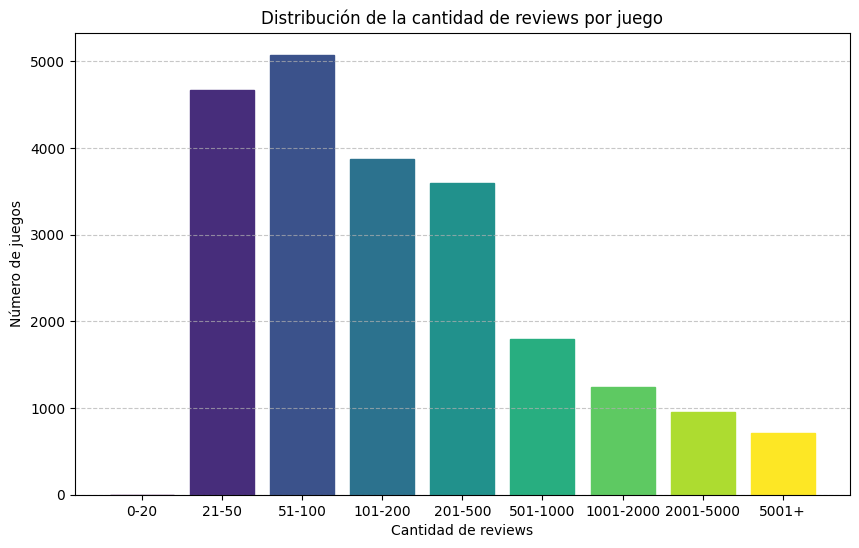

In [42]:
# Crear un gráfico de barras con categorías en lugar de un histograma
plt.figure(figsize=(10, 6))
bins = [0, 21, 51, 101, 201, 501, 1001, 2001, 5001, np.inf]
counts, _ = np.histogram(games_df['NumUserRatings'], bins=bins)
categories = ['0-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-2000', '2001-5000', '5001+']
bars = plt.bar(categories, counts, edgecolor='black')

# Aplicar gradiente de azul a verde
for bar, color in zip(bars, plt.cm.viridis(np.linspace(0, 1, len(bars)))):
    bar.set_color(color)

plt.title('Distribución de la cantidad de reviews por juego')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Número de juegos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [48]:
# Agrupar por Username y contar la cantidad de reviews por usuario
user_review_counts = user_ratings.groupby('Username').size()

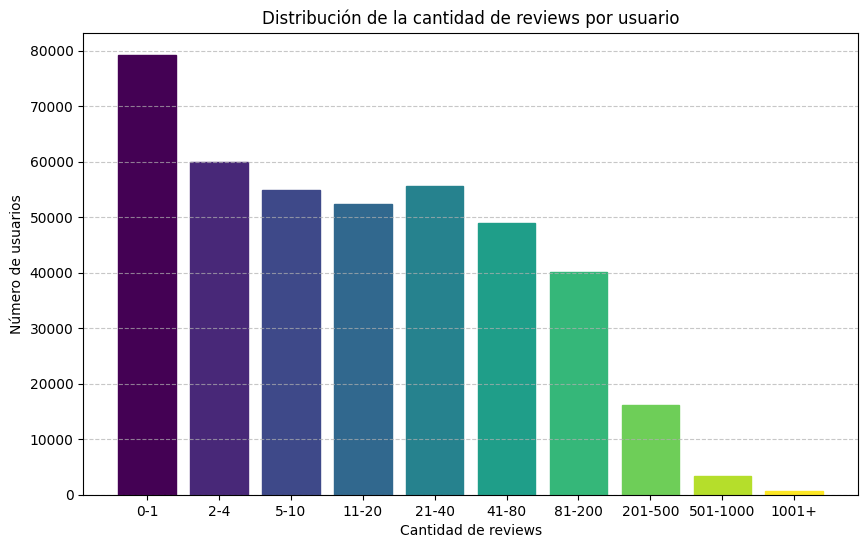

In [53]:
# Crear un gráfico de barras con categorías
plt.figure(figsize=(10, 6))
bins = [0, 2, 5, 11, 21, 41, 81, 201, 501, 1001, np.inf]
counts, _ = np.histogram(user_review_counts, bins=bins)
categories = ['0-1','2-4', '5-10', '11-20', '21-40', '41-80', '81-200', '201-500', '501-1000', '1001+']
bars = plt.bar(categories, counts, edgecolor='black')

# Aplicar gradiente de azul a verde
for bar, color in zip(bars, plt.cm.viridis(np.linspace(0, 1, len(bars)))):
    bar.set_color(color)

plt.title('Distribución de la cantidad de reviews por usuario')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Número de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

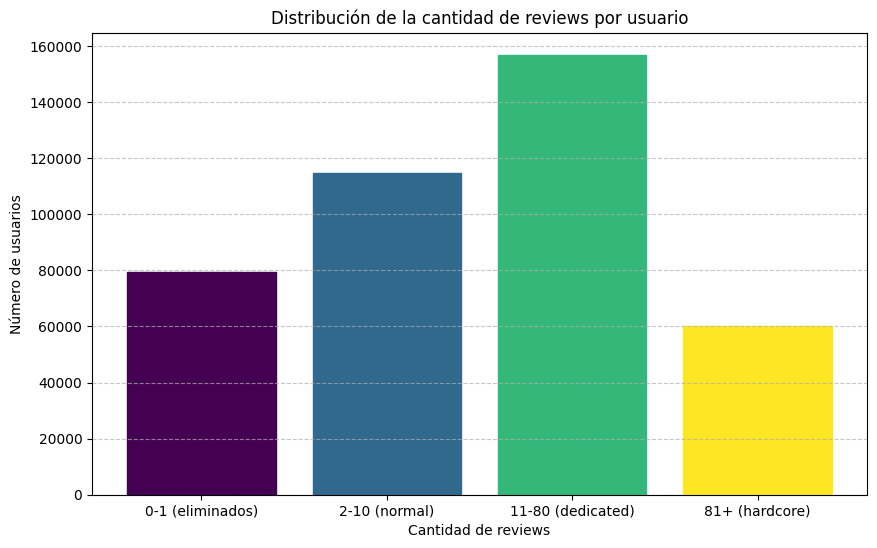

In [55]:
# Crear un gráfico de barras con menos categorías
plt.figure(figsize=(10, 6))
bins = [0, 2, 11, 81, np.inf]
counts, _ = np.histogram(user_review_counts, bins=bins)
categories = ['0-1 (eliminados)','2-10 (normal)', '11-80 (dedicated)', '81+ (hardcore)']
bars = plt.bar(categories, counts, edgecolor='black')

# Aplicar gradiente de azul a verde
for bar, color in zip(bars, plt.cm.viridis(np.linspace(0, 1, len(bars)))):
    bar.set_color(color)

plt.title('Distribución de la cantidad de reviews por usuario')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Número de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()